In [1]:
# importing required libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data

df = pd.read_csv("loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# understanding the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# EDA

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
numeric_columns = df.select_dtypes(include=['int32', 'float64']).columns
object_columns = df.select_dtypes(include=["object"]).columns

In [8]:
print("The Numeric columns are : ", numeric_columns)

The Numeric columns are :  Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')


In [9]:
print("The object columns are  : ", object_columns)

The object columns are  :  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [10]:
# we will use the mean funtion on numeric columns

for column in numeric_columns:
    print(column , '--->',df[column].mean())

CoapplicantIncome ---> 1621.2457980271008
LoanAmount ---> 146.41216216216216
Loan_Amount_Term ---> 342.0
Credit_History ---> 0.8421985815602837


In [11]:
# we will use the mode funtion on Object columns

for column in object_columns:
    if column == 'Loan_ID':
        continue
    print(column , '--->',df[column].mode())

Gender ---> 0    Male
Name: Gender, dtype: object
Married ---> 0    Yes
Name: Married, dtype: object
Dependents ---> 0    0
Name: Dependents, dtype: object
Education ---> 0    Graduate
Name: Education, dtype: object
Self_Employed ---> 0    No
Name: Self_Employed, dtype: object
Property_Area ---> 0    Semiurban
Name: Property_Area, dtype: object
Loan_Status ---> 0    Y
Name: Loan_Status, dtype: object


In [12]:
# univariate anlysis on  numeric columns

for column in numeric_columns:
    print(f"Column {column} -----> Descriptive Statistics")
    print(df[column].describe())
    print(f"Column {column} -----> Value Counts")
    print(df[column].value_counts())
    print(f"Column {column} -----> Mean: {df[column].mean()}")
    print(f"Column {column} -----> Median: {df[column].median()}")
    print(f"Column {column} -----> Variance: {df[column].var()}")
    print(f"Column {column} -----> Standard Deviation: {df[column].std()}")
    print("\n")
    print("_________________________________________________________________")
    print("")


Column CoapplicantIncome -----> Descriptive Statistics
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
Column CoapplicantIncome -----> Value Counts
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
Column CoapplicantIncome -----> Mean: 1621.2457980271008
Column CoapplicantIncome -----> Median: 1188.5
Column CoapplicantIncome -----> Variance: 8562929.518387241
Column CoapplicantIncome -----> Standard Deviation: 2926.2483692241917


_________________________________________________________________

Column LoanAmount -----> Descriptive Statistics
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%    

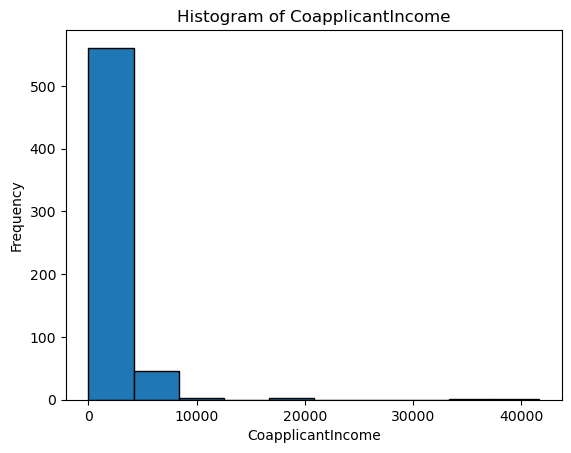

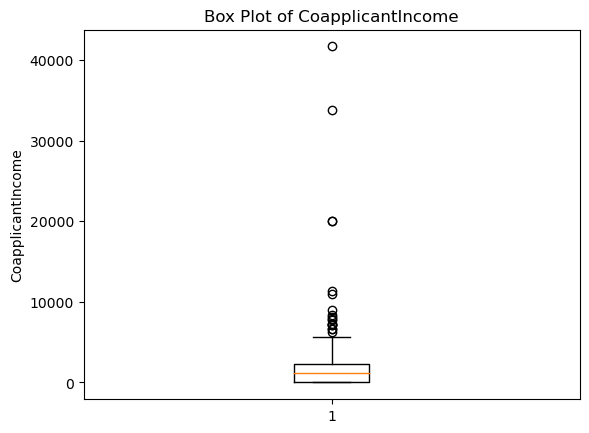

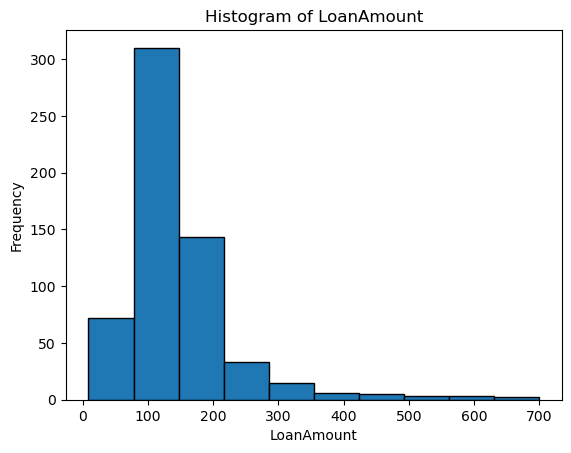

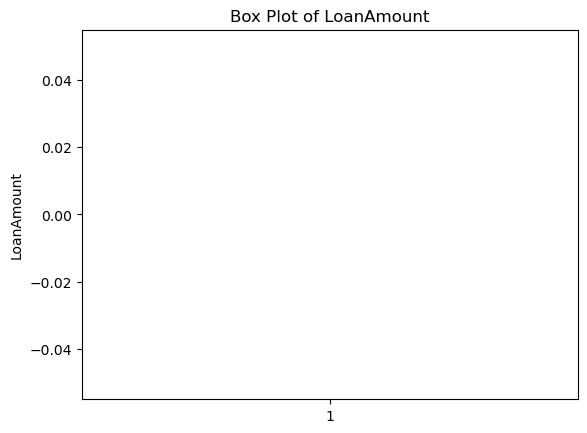

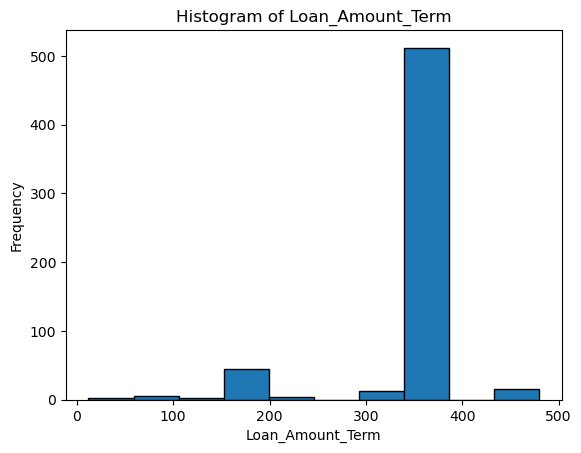

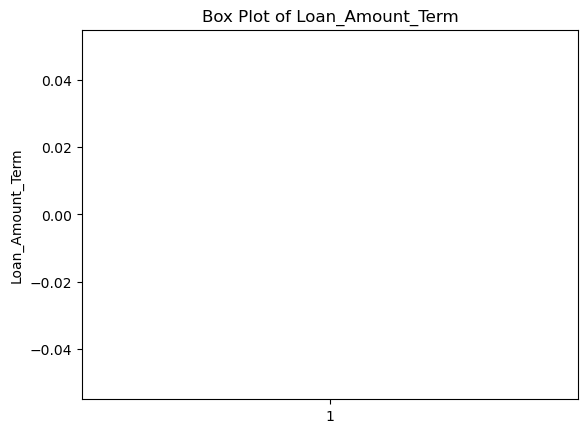

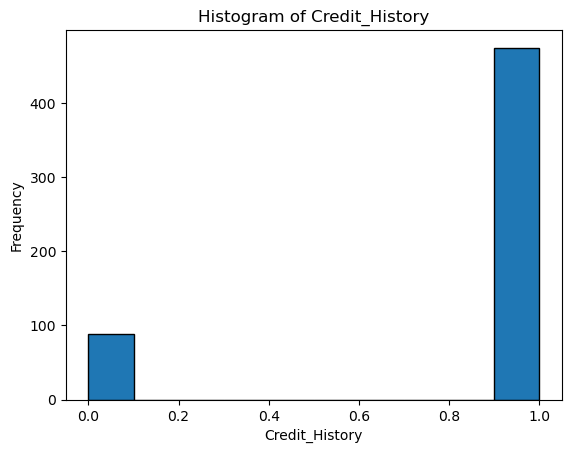

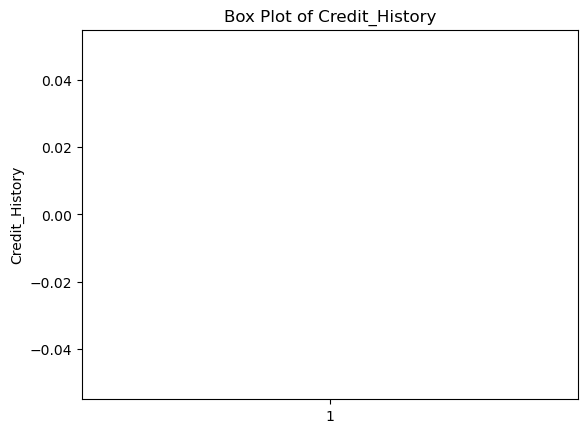

In [13]:
# univariate analysis on numeric columns

for column in numeric_columns:
    # Histogram
    plt.hist(df[column], bins=10, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

Column Loan_ID -----> Descriptive Statistics
count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object
Column Gender -----> Descriptive Statistics
count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
Column Gender -----> Value Counts
Male      489
Female    112
Name: Gender, dtype: int64
Column Gender -----> Mode: Male


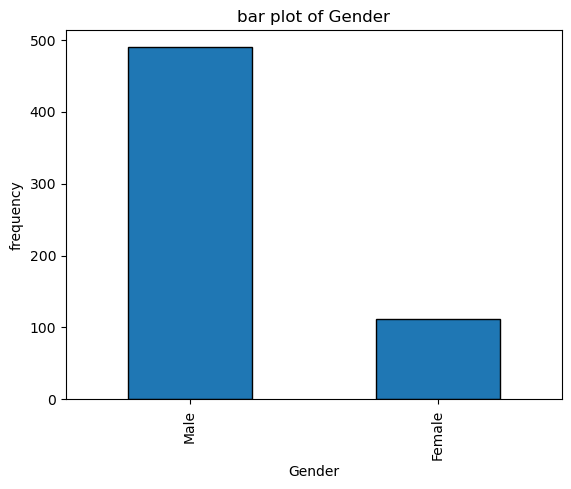

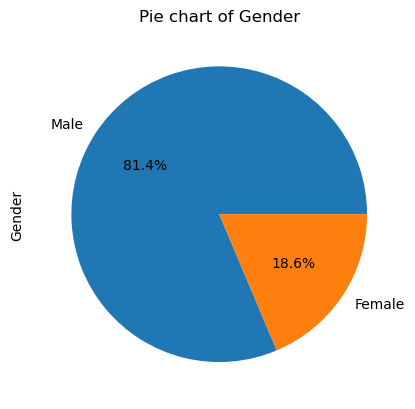


-----------------------------------------------------------------------------------
Column Married -----> Descriptive Statistics
count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
Column Married -----> Value Counts
Yes    398
No     213
Name: Married, dtype: int64
Column Married -----> Mode: Yes


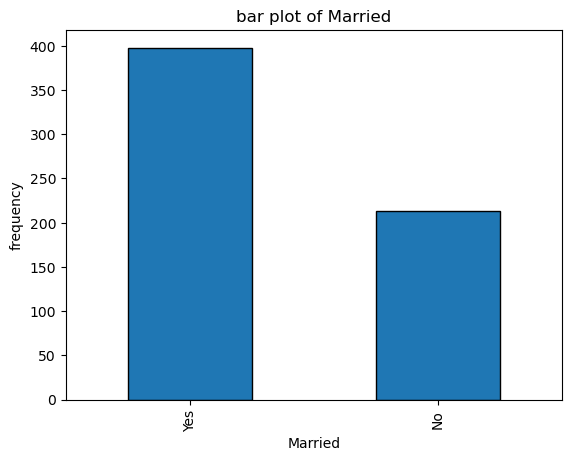

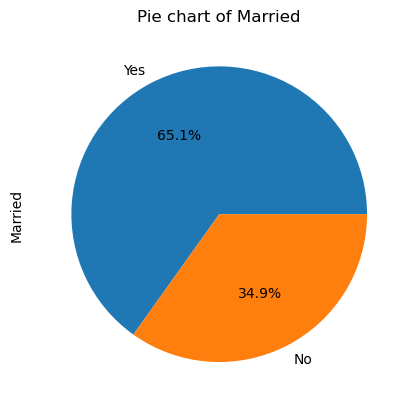


-----------------------------------------------------------------------------------
Column Dependents -----> Descriptive Statistics
count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object
Column Dependents -----> Value Counts
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Column Dependents -----> Mode: 0


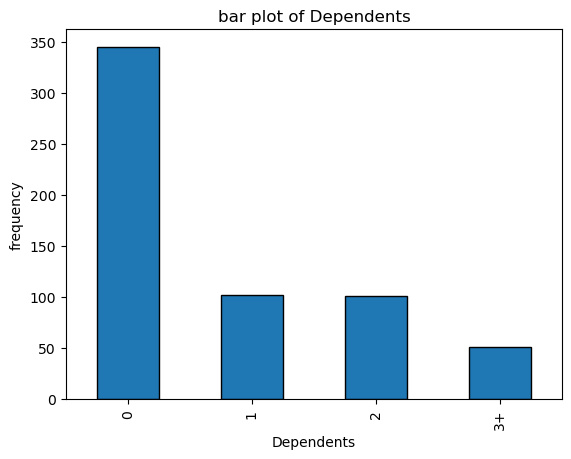

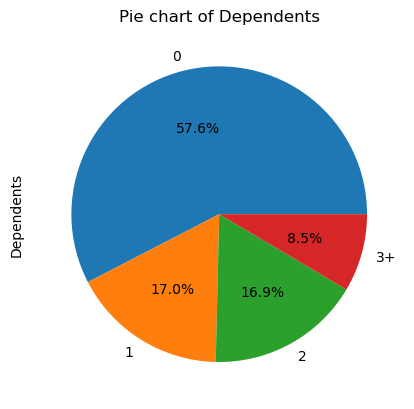


-----------------------------------------------------------------------------------
Column Education -----> Descriptive Statistics
count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Column Education -----> Value Counts
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Column Education -----> Mode: Graduate


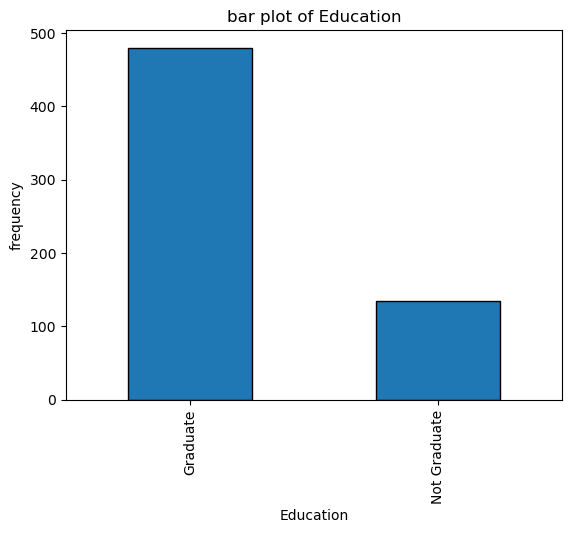

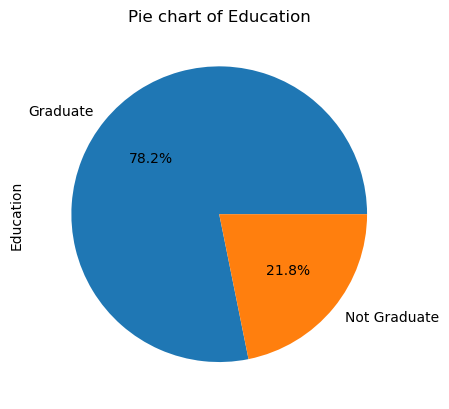


-----------------------------------------------------------------------------------
Column Self_Employed -----> Descriptive Statistics
count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
Column Self_Employed -----> Value Counts
No     500
Yes     82
Name: Self_Employed, dtype: int64
Column Self_Employed -----> Mode: No


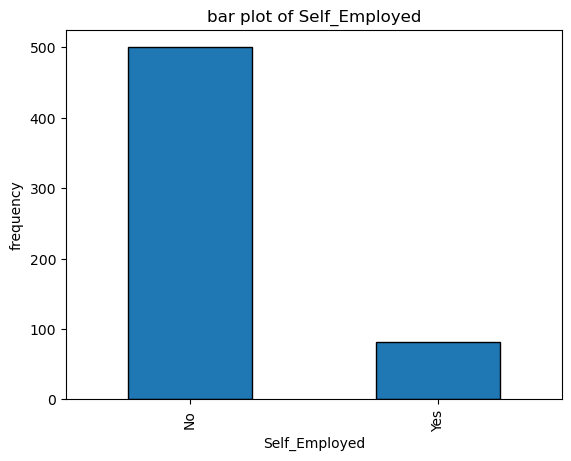

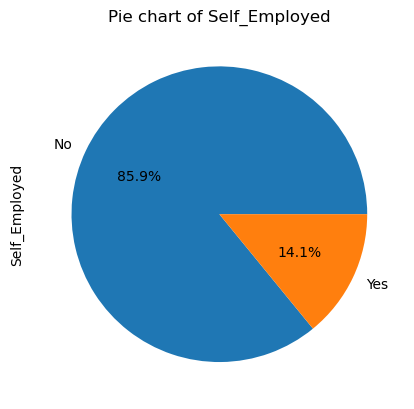


-----------------------------------------------------------------------------------
Column Property_Area -----> Descriptive Statistics
count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
Column Property_Area -----> Value Counts
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Column Property_Area -----> Mode: Semiurban


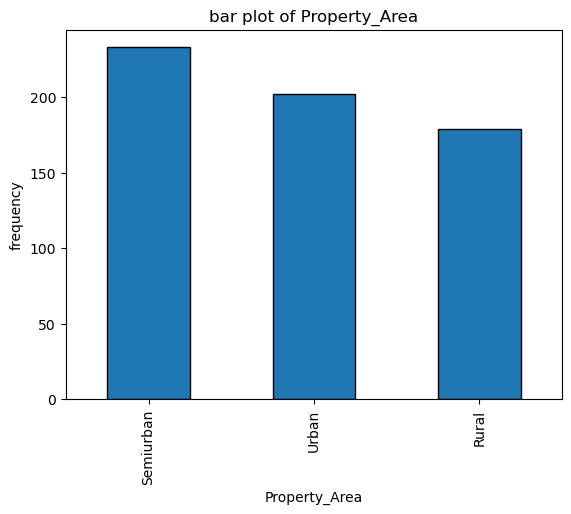

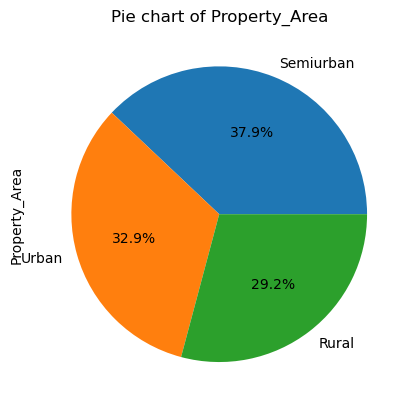


-----------------------------------------------------------------------------------
Column Loan_Status -----> Descriptive Statistics
count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object
Column Loan_Status -----> Value Counts
Y    422
N    192
Name: Loan_Status, dtype: int64
Column Loan_Status -----> Mode: Y


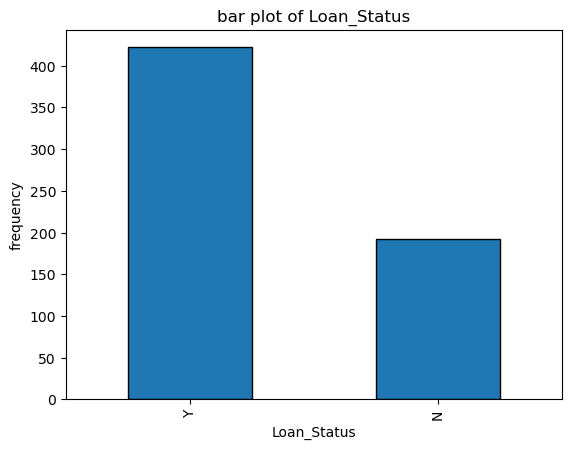

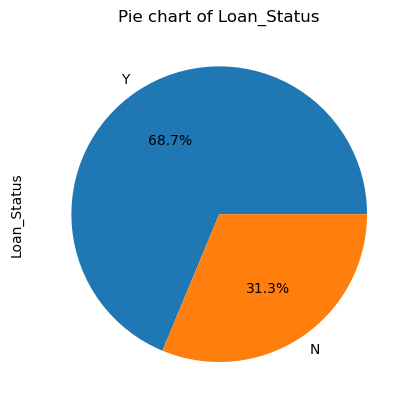


-----------------------------------------------------------------------------------


In [14]:
# univariate analysis on object columns

for column in object_columns:
    
    print(f"Column {column} -----> Descriptive Statistics")
    print(df[column].describe())
    if column != 'Loan_ID':
        print(f"Column {column} -----> Value Counts")
        print(df[column].value_counts())
        print(f"Column {column} -----> Mode: {df[column].mode()[0]}")

        # Bar plot
        df[column].value_counts().plot(kind='bar',edgecolor='black')
        plt.title(f'bar plot of {column}')
        plt.xlabel(column)
        plt.ylabel('frequency')
        plt.show()

        # Pie chart
        df[column].value_counts().plot(kind='pie', autopct="%1.1f%%")
        plt.title(f'Pie chart of {column}')
        plt.show()
        print()
        print("-----------------------------------------------------------------------------------")


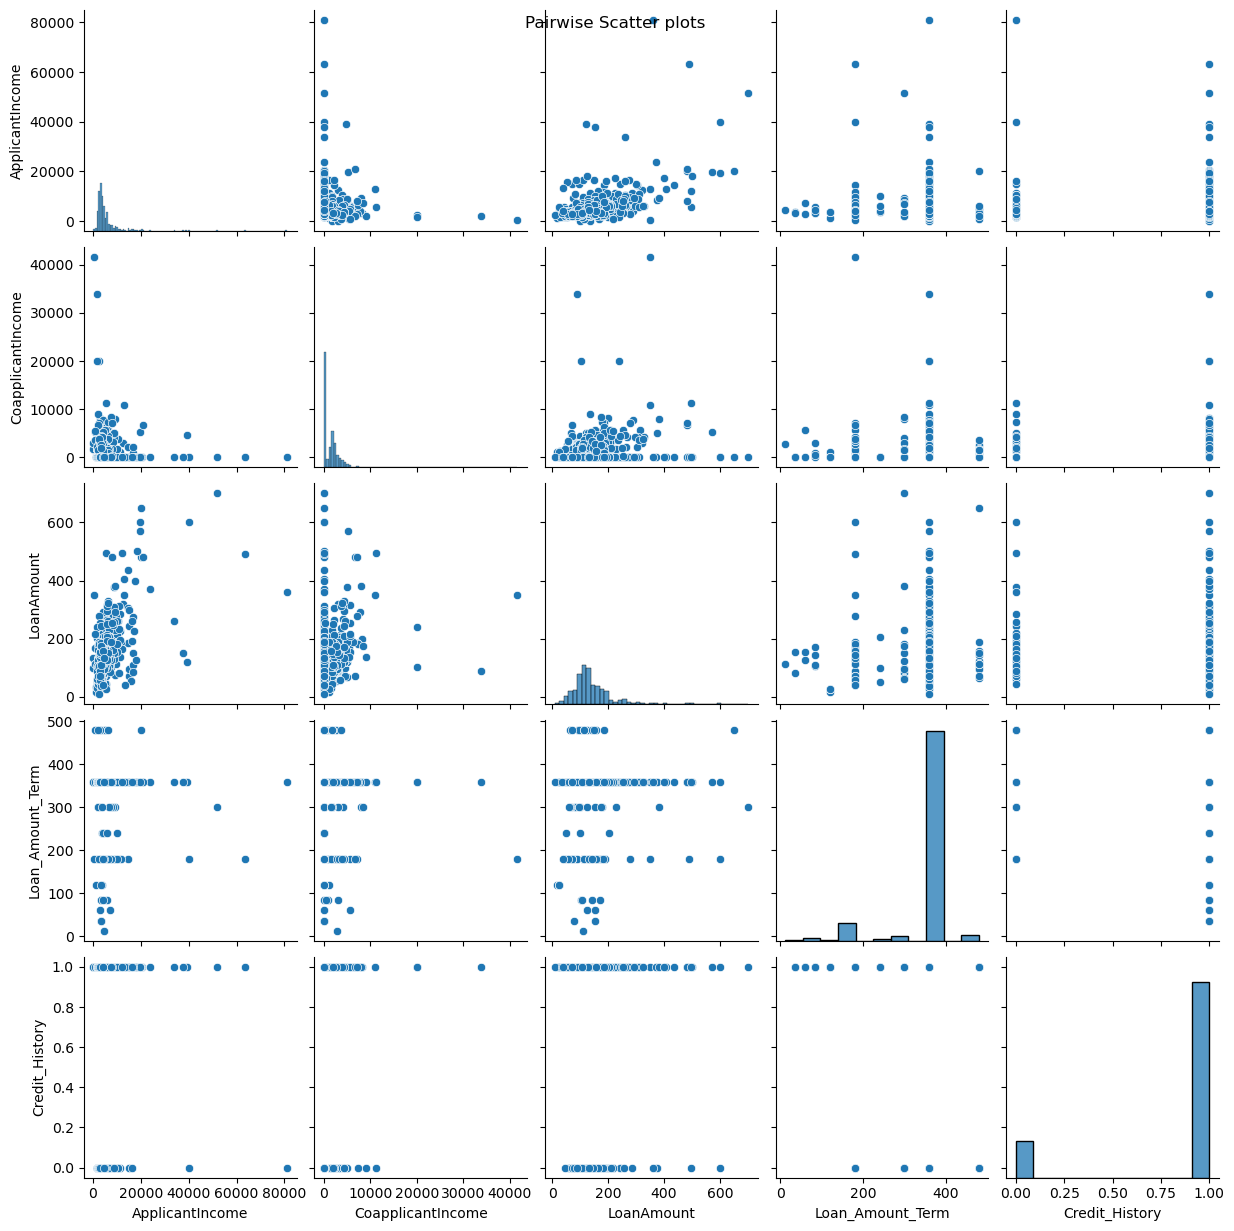

C:\Users\tanna\AppData\Local\Temp\ipykernel_20980\953517073.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[l].corr()


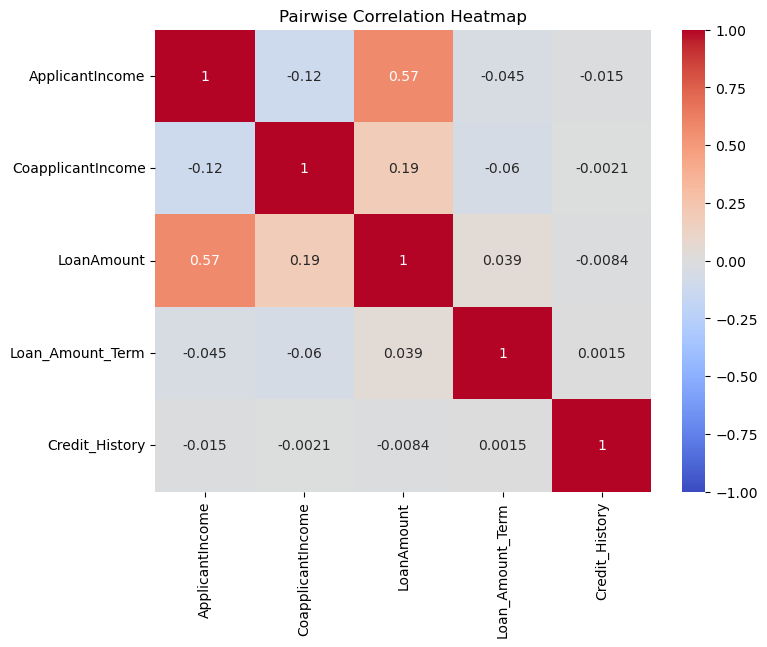

In [15]:
# Biavriate analysis using correlation

l = list(df.columns)

sns.pairplot(df[l])
plt.suptitle("Pairwise Scatter plots")
plt.show()


# Pairwise correlation heatmap
correlation_matrix = df[l].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pairwise Correlation Heatmap')
plt.show()

In [16]:
# missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
# Handling missing values for categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [19]:
# Handling missing values for categorical columns with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
# duplictaes checking
df.duplicated().sum()

0

C:\Users\tanna\AppData\Local\Temp\ipykernel_20980\2888771501.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matirx = df.corr()


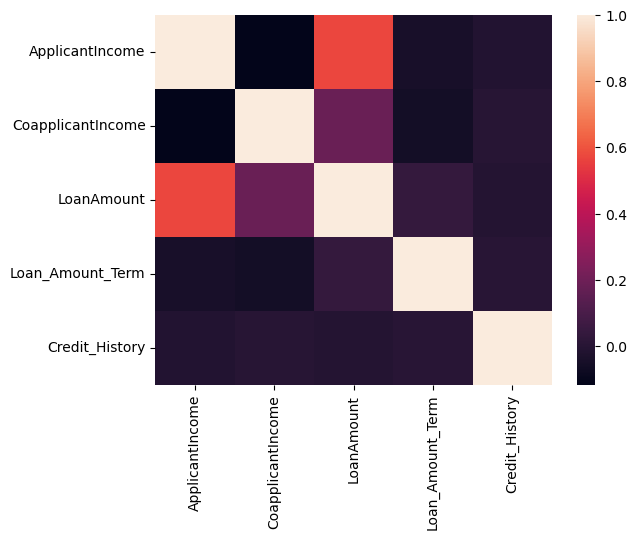

In [22]:
# Correlationn map

correlation_matirx = df.corr()

sns.heatmap(correlation_matrix)
plt.show()

In [23]:
# Feature Engineering

In [24]:
df.drop(columns=["Loan_ID"], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [26]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder()

In [29]:
type(object_columns)

pandas.core.indexes.base.Index

In [30]:
object_columns = object_columns.drop('Loan_ID')

In [31]:
for column in object_columns:
    
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

numeric_data = df[numeric_columns]

scaler.fit(numeric_data)

scaled_numeric_data = scaler.transform(numeric_data)

df[numeric_columns] = scaled_numeric_data

In [34]:
x_train, y_train = df.iloc[:,:-1],df.iloc[:,-1]

In [35]:
x_train.shape

(614, 11)

In [36]:
y_train.shape

(614,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train, test_size=0.25,random_state=42)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name}: {accuracy:.2f}')


Logistic Regression: 0.77
K-Nearest Neighbors: 0.64
Support Vector Machine: 0.65
Decision Tree: 0.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest: 0.78
Gradient Boosting: 0.75
Naive Bayes: 0.78


In [44]:
# based on result we go with GaussianNB classifier

In [45]:
test_data = pd.read_csv("loan_sanction_test.csv")
test_data.drop(columns=["Loan_ID"],inplace=True)

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [47]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [48]:
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mean(),inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)


In [49]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [50]:
# Encode categorical variables
object_cols = test_data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object_cols:
    test_data[col] = le.fit_transform(test_data[col])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
test_data[numerical_cols] = scaler.fit_transform(test_data[numerical_cols])

In [51]:
predictions = models['Naive Bayes'].predict(test_data)

In [52]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,